- Passo 1: Criar a base de dados
- Passo 2: Importar a base de dados
- Passo 3: Visualizar e tratar essa base de dados
- Passo 4: "Dar uma olhada" na sua base de dados
- Passo 5: Construir uma análise para responder as questões

In [3]:
import pandas as pd


# Criar um dataframe com a tabela
dados = {'ID': [1, 2, 3, 4, 5],
         'Nome': ['João', 'Maria', 'Pedro', 'Ana', 'José'],
         'Idade': [25, 32, 45, 28, 37],
         'Gênero': ['Masculino', 'Feminino', 'Masculino', 'Feminino', 'Masculino'],
         'Cidade': ['São Paulo', 'Rio de Janeiro', 'Salvador', 'São Paulo', 'Belo Horizonte'],
         'Valor_Compra': [150.00, 200.00, 100.00, 50.00, 300.00]}

df = pd.DataFrame(dados)

# Especificar o caminho e o nome do arquivo Excel de saída
arquivo_excel = 'tabela_dados.xlsx'

# Criar um objeto do tipo ExcelWriter
writer = pd.ExcelWriter(arquivo_excel, engine='openpyxl')

# Escrever o dataframe no arquivo Excel
df.to_excel(writer, sheet_name='Planilha1', index=False)

# Fechar o objeto ExcelWriter
writer.close()

print("Arquivo Excel criado com sucesso!")

Arquivo Excel criado com sucesso!


Importar tabela para iniciar a tratativa

In [9]:
# Especificar o caminho do arquivo Excel
arquivo_excel = 'C:\\Users\\Notebook\\Desktop\\Projetos pessoais\\Python\\Analise de dados projetos\\tabela_dados.xlsx'

# Carregar o arquivo Excel em um dataframe
tabela = pd.read_excel(arquivo_excel)

# Exibir o dataframe
display(tabela)

,ID,Nome,Idade,Gênero,Cidade,Valor_Compra
0,1,João,25,Masculino,São Paulo,150
1,2,Maria,32,Feminino,Rio de Janeiro,200
2,3,Pedro,45,Masculino,Salvador,100
3,4,Ana,28,Feminino,São Paulo,50
4,5,José,37,Masculino,Belo Horizonte,300


Analisar tamanho do DF, quantas linhas e quantas colunas

In [12]:
df = tabela
num_linhas, num_colunas = df.shape

print('O numero de linhas é :', num_linhas)
print('O numero de colunas é :', num_colunas)

O numero de linhas é : 5
O numero de colunas é : 6


Calcular a média de compras
# de bonus agrupei algumas seções

In [15]:
media_compra = df.groupby(['Gênero', 'Cidade'])['Valor_Compra'].mean()
display(media_compra)

Gênero     Cidade        
Feminino   Rio de Janeiro    200.0
           São Paulo          50.0
Masculino  Belo Horizonte    300.0
           Salvador          100.0
           São Paulo         150.0
Name: Valor_Compra, dtype: float64

Calcular total de compras por gênero

In [16]:
total_compra_genero = df.groupby('Gênero')['Valor_Compra'].sum()
display(total_compra_genero)

Gênero
Feminino     250
Masculino    550
Name: Valor_Compra, dtype: int64

Exibir grafico de barras com vendas por genero

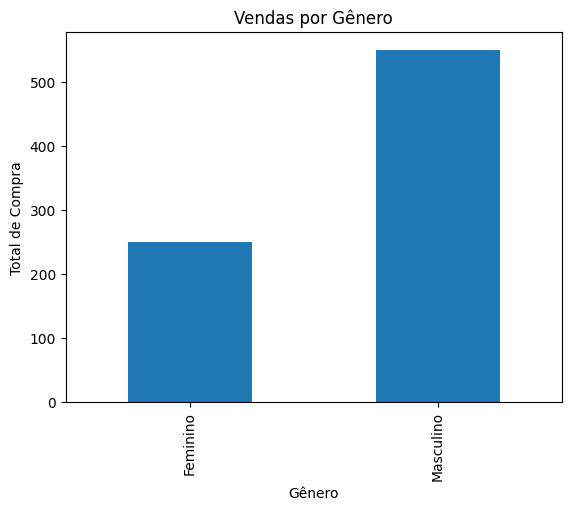

In [18]:
import matplotlib.pyplot as plt

# Plotando o Grafico
total_compra_genero.plot(kind = 'bar')

# Definindo as configurações
plt.xlabel('Gênero')
plt.ylabel('Total de Compra')
plt.title('Vendas por Gênero')

plt.show()

Exibir quem mais comprou

In [19]:
df_agrupado = df.groupby('Nome')['Valor_Compra'].sum().reset_index(name='Total_Compra')
df_ordenado = df_agrupado.sort_values('Total_Compra', ascending=False)

print(df_ordenado.iloc[0]['Nome'], df_ordenado.iloc[0]['Total_Compra'])

José 300


Exibir Total de compras por pessoa

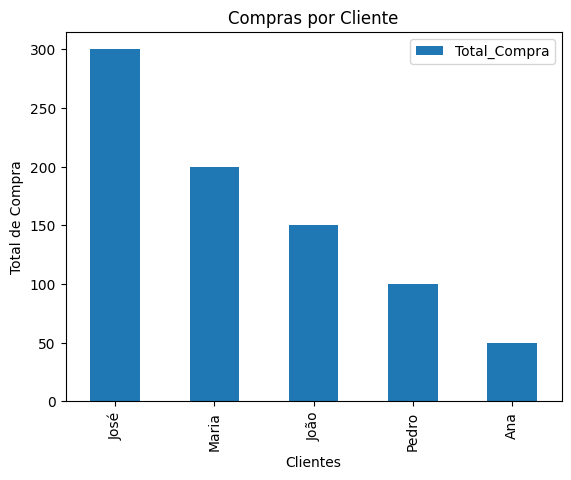

In [30]:
total_por_pessoa = df_ordenado[['Nome', 'Total_Compra']]
total_por_pessoa = total_por_pessoa.set_index('Nome')  # Define a coluna 'Nome' como o índice

total_por_pessoa.plot(kind='bar')

# Definindo as configurações
plt.xlabel('Clientes')
plt.ylabel('Total de Compra')
plt.title('Compras por Cliente')

plt.show()

Filtrar DF para exibir compras acima de 200

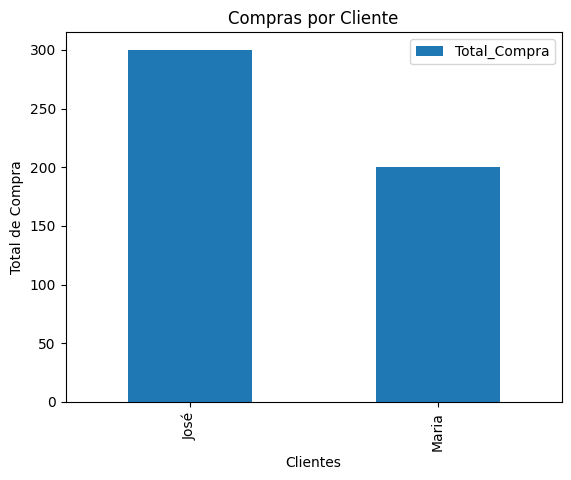

In [32]:
acima_200 = df_ordenado[df_ordenado['Total_Compra'] >= 200]
acima_200 = acima_200.set_index('Nome')  # Define a coluna 'Nome' como o índice

acima_200.plot(kind='bar')

# Definindo as configurações
plt.xlabel('Clientes')
plt.ylabel('Total de Compra')
plt.title('Compras por Cliente')

plt.show()
